In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [10]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [13]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
645,48.0,76.7292,1,48.0,48.0,76.7292,76.7292,76.7292
11,58.0,26.5500,0,58.0,58.0,26.5500,26.5500,26.5500
9,14.0,30.0708,1,14.0,14.0,30.0708,30.0708,30.0708
662,47.0,NaN,0,47.0,47.0,99.0000,-1.0000,999.0000
323,22.0,29.0000,2,22.0,22.0,29.0000,29.0000,29.0000


In [14]:
print('Original Age variable variance:', X_train['Age'].var())
print( 'Age variance after 99 imputation:', X_train['Age_99'].var())
print( 'Age variance after -1 imputation:', X_train['Age_minus1'].var())

print('Original Fare variable variance:', X_train['Fare'].var())
print( 'Fare variance after 999 imputation:', X_train['Fare_999'].var())
print( 'Fare variance after -1 imputation:', X_train['Fare_minus1'].var())


Original Age variable variance: 204.3495133904614
Age variance after 99 imputation: 951.7275570187172
Age variance after -1 imputation: 318.0896202624484
Original Fare variable variance: 2448.197913706318
Fare variance after 999 imputation: 47219.20265217623
Fare variance after -1 imputation: 2378.5676784883503


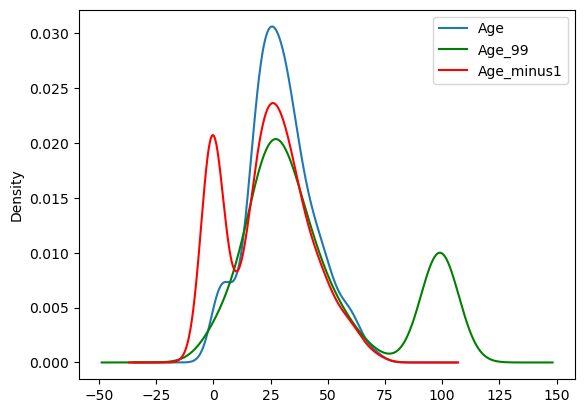

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind = 'kde', ax = ax)

# variable imputed with 99
X_train['Age_99'].plot(kind = 'kde', ax = ax, color = 'green')

# variable imputed with -1
X_train['Age_minus1'].plot(kind = 'kde', ax = ax, color = 'red')

# add legends
plt.legend()
plt.show()

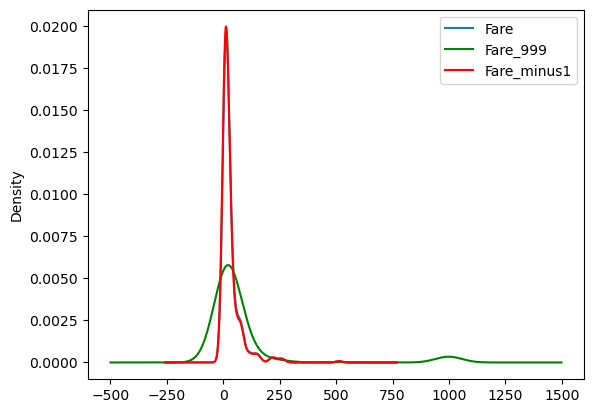

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind = 'kde', ax = ax)

# variable imputed with 99
X_train['Fare_999'].plot(kind = 'kde', ax = ax, color = 'green')

# variable imputed with -1
X_train['Fare_minus1'].plot(kind = 'kde', ax = ax, color = 'red')

# add legends
plt.legend()
plt.show()

In [17]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188,162.793430
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989,11.528625
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400,-159.931663
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141,257.379887
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409,5408.147749
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678,762.474982
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,5408.147749,762.474982,47219.202652


In [18]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585,0.051179
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233,0.032079
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687,-0.023857
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514,0.066411
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648,0.494206
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000,0.071946
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,0.494206,0.071946,1.000000


# Using SKlearn

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [20]:
imputer1 = SimpleImputer(strategy = 'constant',fill_value = 99)
imputer2 = SimpleImputer(strategy = 'constant', fill_value = 999)

In [21]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
], remainder = 'passthrough')

In [22]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [23]:
trf.named_transformers_['imputer1'].statistics_ # median

array([99.])

In [24]:
trf.named_transformers_['imputer2'].statistics_ # mean

array([999.])